# Data Analysis on Amazon Movie & TV Reviews [3830ICT Assignment 1]

# 1. Data Preperation & Preprocessing

## 1.1. Read the Dataset

Import the relevant modules to be used later on:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import gzip
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

The dataset is in .json.gz format (GZipped JavaScript Object Notation)

Read the dataset:

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Baby_5.json.gz')

This dataset contains product reviews and metadata from Amazon, specific to the Movies & TV category.

Read the metadata dataset:

In [3]:
metadf = getDF('meta_Baby.json.gz')

This dataset contains product information assosiated with the asin number in the review dataset.

## 1.2. View the Dataset (before cleaning)

### 1.2.1 Reviews Dataset

The following methods allow us to describe and view the dataset before cleaning.

View the head of the dataset:

In [4]:
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1HK2FQW6KXQB2,097293751X,"Amanda Johnsen ""Amanda E. Johnsen""","[0, 0]",Perfect for new parents. We were able to keep ...,5.0,Awesine,1373932800,"07 16, 2013"
1,A19K65VY14D13R,097293751X,angela,"[0, 0]",This book is such a life saver. It has been s...,5.0,Should be required for all new parents!,1372464000,"06 29, 2013"
2,A2LL1TGG90977E,097293751X,Carter,"[0, 0]",Helps me know exactly how my babies day has go...,5.0,Grandmother watching baby,1395187200,"03 19, 2014"
3,A5G19RYX8599E,097293751X,cfpurplerose,"[0, 0]",I bought this a few times for my older son and...,5.0,repeat buyer,1376697600,"08 17, 2013"
4,A2496A4EWMLQ7,097293751X,C. Jeter,"[0, 0]",I wanted an alternative to printing out daily ...,4.0,Great,1396310400,"04 1, 2014"
5,A3OQEVD4C7G3L3,097293751X,CMB,"[0, 0]","This is great for basics, but I wish the space...",4.0,"Great for basics, but not detail",1399680000,"05 10, 2014"
6,ATZDT4B1U7NL,097293751X,HYM,"[0, 0]",My 3 month old son spend half of his days with...,5.0,Perfect for the working mom,1374019200,"07 17, 2013"
7,A3NMPMELAZC8ZY,097293751X,Jakell,"[3, 3]",This book is perfect! I'm a first time new mo...,5.0,Great for newborns,1359244800,"01 27, 2013"
8,A1ZSTU6RKY1JCL,097293751X,Jen,"[0, 0]","I wanted to love this, but it was pretty expen...",3.0,"It's ok, but I liked a regular weekly planner ...",1398124800,"04 22, 2014"
9,A1TFH58BMFJCR3,097293751X,killerbee,"[0, 0]",The Baby Tracker brand books are the absolute ...,5.0,Best for Tracking!,1384819200,"11 19, 2013"


View the tail of the dataset:

In [5]:
df.tail(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
160782,A34T0JYVRU1M2B,B00L13XFIE,Nukke,"[1, 1]","These are really absorbent and super soft, but...",4.0,serging issue,1385942400,"12 2, 2013"
160783,A1AFNMTDISXUJE,B00L13XFIE,Qutie,"[1, 2]",I've used a variety of cloth covers and insert...,5.0,My favorite inserts - hemp/cotton,1365033600,"04 4, 2013"
160784,A1ZS6UQ9RVUX97,B00L13XFIE,R. Nafziger,"[1, 2]","The Best Bottom system is really great, especi...",5.0,"Convenient snap, very absorbent",1375747200,"08 6, 2013"
160785,A3K43QC9YZKVTH,B00L13XFIE,Robin J.,"[0, 0]",These inserts are super absorbent. A little bu...,5.0,Super absorbent!,1371772800,"06 21, 2013"
160786,A3OKEFOUD89F9P,B00L13XFIE,Sam1345,"[0, 0]",The concept of these inserts are great! They k...,4.0,Great system with some flaws!,1360108800,"02 6, 2013"
160787,A30J0DKNKCF7SR,B00L13XFIE,SD,"[0, 0]",Bought this as a baby gift and my friend heard...,5.0,Great baby gift,1391126400,"01 31, 2014"
160788,AG4E44KM93P4L,B00L13XFIE,Silofish,"[0, 1]",I am new to cloth diapering. I was leery that ...,4.0,Not too bulky,1343606400,"07 30, 2012"
160789,A2UZUH4QHV4HA1,B00L13XFIE,"S. Smith ""sunnshyne309""","[0, 0]",My friend is planning on cloth diapering and I...,5.0,great help!,1364256000,"03 26, 2013"
160790,A2Z26PUQPMT5JV,B00L13XFIE,Stephanie S. Kim,"[0, 0]",We LOVE the organic cotton/hemp inserts. They'...,5.0,Love these diapers!,1391731200,"02 7, 2014"
160791,A3CIIOMK18CHXM,B00L13XFIE,Viviana,"[1, 1]",These are great. I should have bought hemp ins...,5.0,Really absorbent,1355788800,"12 18, 2012"


View the shape (number of columns, rows) of the dataset:

In [6]:
df.shape

(160792, 9)

View the column names (attributes) of the dataset:

In [7]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

The .info() method provides important information about the dataset, such as the number of rows, number of columns, number of non-missing values in each column, and the data type stored in each column:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160792 entries, 0 to 160791
Data columns (total 9 columns):
reviewerID        160792 non-null object
asin              160792 non-null object
reviewerName      159427 non-null object
helpful           160792 non-null object
reviewText        160792 non-null object
overall           160792 non-null float64
summary           160792 non-null object
unixReviewTime    160792 non-null int64
reviewTime        160792 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 12.3+ MB


The .describe() method calculates summary statistics of the data:

In [9]:
df.describe()

,overall,unixReviewTime
count,160792.000000,1.607920e+05
mean,4.214115,1.350242e+09
std,1.144325,5.616114e+07
min,1.000000,9.824544e+08
25%,4.000000,1.331942e+09
50%,5.000000,1.365811e+09
75%,5.000000,1.386547e+09
max,5.000000,1.405987e+09


Most reviews are high.

Visualise the number of good/bad ratings:

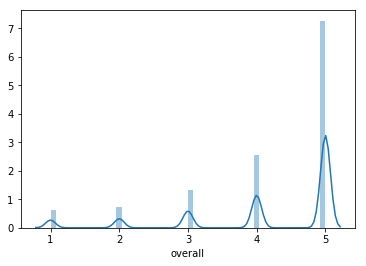

In [10]:
sns.distplot(df['overall'])

The ratings data is left skewed.

(array([  7819.,   9193.,  17255.,  32999.,  93526.]),
 array([1, 2, 3, 4, 5, 6]),
 <a list of 5 Patch objects>)

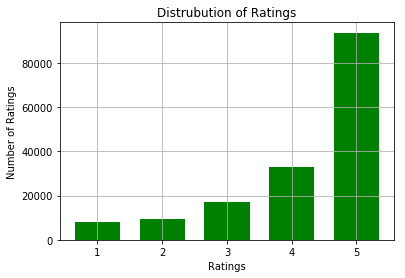

In [11]:
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.title('Distrubution of Ratings')
plt.grid(True)
plt.hist(df['overall'], bins=range(1,7), align='left', rwidth=0.7, color='g')

### 1.2.2 Metadata Dataset

In [12]:
metadf.head(10)

,asin,categories,description,title,price,imUrl,brand,related,salesRank
0,0188399313,[[Baby]],Wee-Go Glass baby bottles by LifeFactory (Baby...,Lifefactory 4oz BPA Free Glass Baby Bottles - ...,69.99,http://ecx.images-amazon.com/images/I/41Swthpd...,Lifefactory,"{'also_bought': ['B002SG7K7A', 'B003CJSXW8', '...",NaN
1,0188399518,[[Baby]],The Planet Wise Flannel Wipes are 10 super sof...,Planetwise Flannel Wipes,15.95,http://ecx.images-amazon.com/images/I/41otjnA4...,Planet Wise,"{'also_bought': ['B00G96N3YY', 'B003XSEV2O', '...",NaN
2,0188399399,[[Baby]],The Planet Wise Wipe PouchTM features our pate...,Planetwise Wipe Pouch,10.95,http://ecx.images-amazon.com/images/I/61x8h9u6...,NaN,"{'also_bought': ['B005WWI0DA', 'B005WWIMGA', '...",NaN
3,0316967297,[[Baby]],Hand crafted set includes 1 full quilt (76x86 ...,Annas Dream Full Quilt with 2 Shams,109.95,http://ecx.images-amazon.com/images/I/51%2BZ1%...,NaN,"{'also_viewed': ['B009LTER3W', 'B00575TI5Q', '...",NaN
4,0615447279,[[Baby]],Thumbuddy To Love- The Binky Fairy helps child...,Stop Pacifier Sucking without tears with Thumb...,16.95,http://ecx.images-amazon.com/images/I/51RKKENl...,,"{'also_bought': ['0979670004', '1601310234', '...",NaN
5,0670062049,[[Baby]],A baby can be put at risk with an unsafe pacif...,5 Pink Gumdrops + One Pacifier Clip,9.99,http://ecx.images-amazon.com/images/I/41u7qILN...,NaN,"{'also_viewed': ['B005QPE0W8', 'B00AZWDLHM', '...",NaN
6,0705391752,[[Baby]],Overview\n\nInclude the beloved Peter Rabbit i...,A Tale of Baby's Days with Peter Rabbit,65.07,http://ecx.images-amazon.com/images/I/51%2BNFd...,NaN,"{'also_viewed': ['B001AL7GOQ', '0723256837', '...",NaN
7,097293751X,[[Baby]],Easily keep track of your baby's or child's da...,"Baby Tracker&reg; - Daily Childcare Journal, S...",17.00,http://ecx.images-amazon.com/images/I/41Bb6wf%...,Time Too,"{'also_bought': ['9729375011', 'B004FN1AE8', '...",NaN
8,0974671517,[[Baby]],What should we call the Twins? uses an amusing...,Wee Gallery Twins Board Book,3.58,http://ecx.images-amazon.com/images/I/51lCiAJW...,Wee Gallery,"{'also_bought': ['0670013102', '0763637025', '...",NaN
9,0980027519,[[Baby]],"These adorable, high quality calendars are gen...",Nature's Lullabies First and Second Year Calen...,NaN,http://ecx.images-amazon.com/images/I/41NAMKmS...,NaN,NaN,NaN


In [13]:
metadf.tail(10)

,asin,categories,description,title,price,imUrl,brand,related,salesRank
71307,B00LBG2PXW,[[Baby]],The Squeasy Snacker is the most versatile reus...,Squeasy Snacker 6oz Silicone Reusable Food Pou...,12.99,http://ecx.images-amazon.com/images/I/31TLcne%...,NaN,"{'also_bought': ['B00AM3E9KM', 'B00B9ZHLRU', '...",NaN
71308,B00LCMZ5N2,[[Baby]],"The Who Baby original ""teethable"" jewelry. Ins...",Baby Teething Necklace for Mom Pretty Donut Sh...,14.99,http://ecx.images-amazon.com/images/I/21H%2BKG...,NaN,"{'also_viewed': ['B00CXAL2SY', 'B007N3KNA4', '...",NaN
71309,B00LD5YOT4,[[Baby]],This is the seat children pick as often as par...,"Graco Highback TurboBooster Car Seat, Emille",69.28,http://ecx.images-amazon.com/images/I/51j-ec39...,Graco,"{'also_viewed': ['B00GY8J8GO', 'B00AHVR7ZI', '...",NaN
71310,B00LK5J73U,[[Baby]],The #1 TOP RATED Baby Back Seat Car MirrorThe ...,Baby &amp; Mom Back Seat Rear View Baby Mirror...,19.99,http://ecx.images-amazon.com/images/I/51irepEa...,NaN,"{'also_viewed': ['B008HCXIU2', 'B004L2JJAK', '...",NaN
71311,B00LKI1O2E,[[Baby]],Deep Cleans to remove excess dirt and oil that...,"Cuticura Medicated Anti-Bacterial Bar Soap, Or...",NaN,http://ecx.images-amazon.com/images/I/510oVEes...,NaN,{'also_viewed': ['B000052YL1']},NaN
71312,B00LL4K3GU,[[Baby]],Abstract Soft Spout Training is an ideal optio...,Abstract 2 PK Baby / Toddler Training Cup (Pink),NaN,http://ecx.images-amazon.com/images/I/41wXwyCd...,NaN,NaN,NaN
71313,B00LLEOSUW,[[Baby]],Introducing the Tutti Bimbi Baby Food Freezer ...,"Baby Food Freezer Tray - Bacteria Resistant, B...",17.95,http://ecx.images-amazon.com/images/I/31HI7L%2...,NaN,"{'also_viewed': ['B0027UYT4O', 'B004A9ZF3Y', '...",NaN
71314,B00LPFHMNM,[[Baby]],"With a new packaging, our best-selling shampoo...",Shampoo Fudge Clean Blonde Violet Toning Shamp...,NaN,http://ecx.images-amazon.com/images/I/41sFcpvs...,NaN,"{'also_viewed': ['B003Z922MC', 'B001W6Q2KS', '...",NaN
71315,B00LQXWHXI,[[Baby]],"The Best Baby Shade Ever!""I have never been ha...",Best 2 Pack Baby Car Shade for Kids - Window S...,9.96,http://ecx.images-amazon.com/images/I/41LGiDVu...,NaN,"{'also_viewed': ['B00K80DFUY', 'B00KF2SCMQ', '...",NaN
71316,B00M08188I,[[Baby]],EasyGoPro Ergonomic Toilet Footrest70 Day Mone...,easyGopro Ergonomic Toilet Footrest for Easier...,21.99,http://ecx.images-amazon.com/images/I/31LgOaDu...,NaN,"{'also_viewed': ['B008G9B11E', 'B00G5PTWT4', '...",NaN


In [14]:
metadf.shape

(71317, 9)

In [15]:
metadf.columns

Index(['asin', 'categories', 'description', 'title', 'price', 'imUrl', 'brand',
       'related', 'salesRank'],
      dtype='object')

In [16]:
metadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71317 entries, 0 to 71316
Data columns (total 9 columns):
asin           71317 non-null object
categories     71317 non-null object
description    65642 non-null object
title          71241 non-null object
price          57741 non-null float64
imUrl          71243 non-null object
brand          27858 non-null object
related        58721 non-null object
salesRank      36 non-null object
dtypes: float64(1), object(8)
memory usage: 5.4+ MB


In [17]:
metadf.describe()

,price
count,57741.000000
mean,46.572908
std,81.880395
min,0.010000
25%,11.000000
50%,19.950000
75%,41.980000
max,999.990000


## 1.3. Cleaning 

### 1.3.1. Formatting

Convert data to a standard format for easy manipulation.

Convert the reviewTime column to datetime type:

In [18]:
df['reviewTime_convert'] = pd.to_datetime(df.reviewTime)

Check if it worked:

In [19]:
df[['reviewTime','reviewTime_convert']].head(5)

,reviewTime,reviewTime_convert
0,"07 16, 2013",2013-07-16
1,"06 29, 2013",2013-06-29
2,"03 19, 2014",2014-03-19
3,"08 17, 2013",2013-08-17
4,"04 1, 2014",2014-04-01


The data is now datetime type & is read YYYY-MM-DD.

Similarly unixReviewTime can also be converted to dateTime type:

However unixReviewTime will be droped later as it is redundant, so it will not be converted.

Change overall to integer type:

In [20]:
df['overall'] = df['overall'].astype(int)

Check if it worked:

In [21]:
df['overall'].head(5)

0    5
1    5
2    5
3    5
4    4
Name: overall, dtype: int32

In [22]:
df['reviewText'] = df['reviewText'].astype(str)

### 1.3.2. Missing Data

#### 1.3.2.1. Reviews Dataset

Check for missing data:

In [23]:
df.isnull().sum()

reviewerID               0
asin                     0
reviewerName          1365
helpful                  0
reviewText               0
overall                  0
summary                  0
unixReviewTime           0
reviewTime               0
reviewTime_convert       0
dtype: int64

There are 6076 reviews with missing reviewer names.

Fill the missing data with the string 'Unknown':

In [24]:
df.fillna('Unknown', inplace=True)

Check if it worked:

In [25]:
df.isnull().sum()

reviewerID            0
asin                  0
reviewerName          0
helpful               0
reviewText            0
overall               0
summary               0
unixReviewTime        0
reviewTime            0
reviewTime_convert    0
dtype: int64

There is now no cells with missing data.

#### 1.3.2.2. Product Metadata Dataset

Check for missing data:

In [26]:
metadf.isnull().sum()

asin               0
categories         0
description     5675
title             76
price          13576
imUrl             74
brand          43459
related        12596
salesRank      71281
dtype: int64

Unlike the review dataset alot of data is missing in the metadata dataset.

Almost all of the salesRank attribute data is missing, it could be dropped, but it might still have some valuable data.

### 1.3.3. Invalid Data

Check for invalid data.

Check that all values in overall are between 0-5:

In [27]:
df.loc[(df['overall']<0) | (df['overall']>5)]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewTime_convert


Check that all dates in reviewTime are between May 1996 - July 2014:

In [28]:
df.loc[(df['reviewTime_convert']<'1996-05-01') | (df['reviewTime_convert']>'2014-07-31')]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewTime_convert


There is no invalid data.

### 1.3.4. Irrelevant Data 

Remove irrelevant data.

Remove unixReviewTime column as it has the same meaning as the reviewTime attribute in this dataset:

In [29]:
del df['unixReviewTime']

Remove original reviewTime attribute as we have it as reviewTime_convert in datetime type. 

In [30]:
del df['reviewTime']

The categories attribute only contains 'Baby' for this metadata dataset, so it can be dropped.

In [31]:
metadf.groupby("categories")

In [32]:
del metadf['categories']

Image urls are also unneeded, so that attribute can be dropped.

In [33]:
del metadf['imUrl']

### 1.3.5. Inconsistent data

Two different reviewers should not have the same ID.

In [34]:
group = df.groupby('reviewerID')['reviewerName'].unique()
group[group.apply(lambda x: len(x)>1)].head(10)

reviewerID
A100L918633LUO    [NancyL "THE MOM", Unknown]
A109JH6SL0SVL           [R. Seifert, Unknown]
A10BSS8EZFU0RZ       [Denise Fnord, DD Fnord]
A10M8NPLM2ZLDE     [Jersey2Carolina, Unknown]
A10QHN10Y8CXE5                 [sap, Unknown]
A10QXGW9BSFHA9             [KatzeX3, Unknown]
A10XL2CAKT7XWD          [GMLSimmons, Unknown]
A10YNQJGREXZ4N         [Jennifer S., Unknown]
A117O44ZF2WD7D              [jojo22, Unknown]
A117PQAH6ZLJ97        [Unknown, tkandisjones]
Name: reviewerName, dtype: object

### 1.3.6. Check

In [35]:
df.head(20)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,reviewTime_convert
0,A1HK2FQW6KXQB2,097293751X,"Amanda Johnsen ""Amanda E. Johnsen""","[0, 0]",Perfect for new parents. We were able to keep ...,5,Awesine,2013-07-16
1,A19K65VY14D13R,097293751X,angela,"[0, 0]",This book is such a life saver. It has been s...,5,Should be required for all new parents!,2013-06-29
2,A2LL1TGG90977E,097293751X,Carter,"[0, 0]",Helps me know exactly how my babies day has go...,5,Grandmother watching baby,2014-03-19
3,A5G19RYX8599E,097293751X,cfpurplerose,"[0, 0]",I bought this a few times for my older son and...,5,repeat buyer,2013-08-17
4,A2496A4EWMLQ7,097293751X,C. Jeter,"[0, 0]",I wanted an alternative to printing out daily ...,4,Great,2014-04-01
5,A3OQEVD4C7G3L3,097293751X,CMB,"[0, 0]","This is great for basics, but I wish the space...",4,"Great for basics, but not detail",2014-05-10
6,ATZDT4B1U7NL,097293751X,HYM,"[0, 0]",My 3 month old son spend half of his days with...,5,Perfect for the working mom,2013-07-17
7,A3NMPMELAZC8ZY,097293751X,Jakell,"[3, 3]",This book is perfect! I'm a first time new mo...,5,Great for newborns,2013-01-27
8,A1ZSTU6RKY1JCL,097293751X,Jen,"[0, 0]","I wanted to love this, but it was pretty expen...",3,"It's ok, but I liked a regular weekly planner ...",2014-04-22
9,A1TFH58BMFJCR3,097293751X,killerbee,"[0, 0]",The Baby Tracker brand books are the absolute ...,5,Best for Tracking!,2013-11-19


In [36]:
df.describe()

,overall
count,160792.000000
mean,4.214115
std,1.144325
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## 1.4. Dimensionality Reduction

# 2. Data Analysis

## 2.1. Sentiment

Clasify a review as positive if it is a 4 or a 5, anything below 4 is considered a negative review.

In [176]:
df['sentiment'] = np.where(df['overall']>3, 1, 0)

In [178]:
dfPosRec = df.loc[(df['sentiment']==1) & (df['reviewTime_convert']>'2012-01-01')]
dfNegRec = df.loc[(df['sentiment']==0) & (df['reviewTime_convert']>'2012-01-01')]
dfPoor = df.loc[df['overall']==1]

Create a word(tag) cloud for positive reviews, negative reviews, & 1-star reviews. (only use first 1000)

In [172]:
def makeWordCloud(dataframe):

    allwords = ''

    for data in dataframe['reviewText'][:2000]:

        tokens = data.split()

        # Convert each token to lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        for words in tokens:
            allwords = allwords + words + ' '


    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=500,max_font_size=40, relative_scaling=.2).generate(allwords)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    

Positive Review Word Cloud (4/5 star)

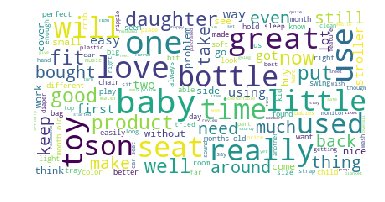

In [167]:
makeWordCloud(dfPosRec)

Negative Review Word Cloud (1/2/3 star)

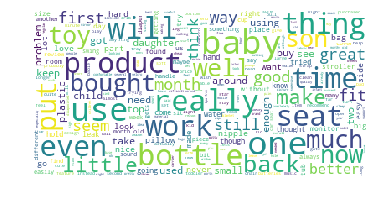

In [168]:
makeWordCloud(dfNegRec)

Poor Review Word Cloud (1 star)

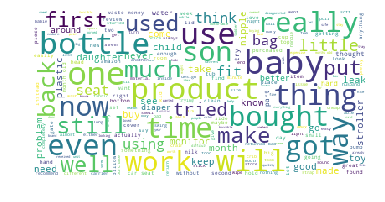

In [175]:
makeWordCloud(dfPoor)

## 2.2. Exploratory Analysis

In [89]:
dfSorted = df.sort_values(by='reviewTime_convert')

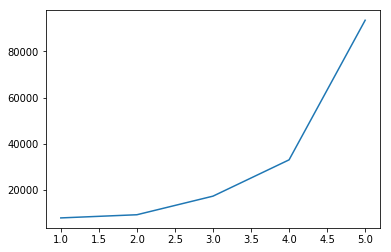

In [111]:
plt.plot((dfSorted.overall).value_counts())

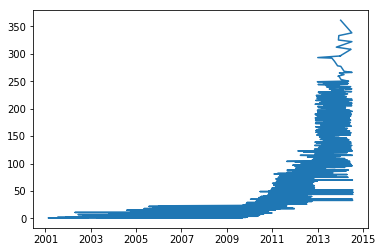

In [107]:
plt.plot(dfSorted['reviewTime_convert'].value_counts())

Text(0.5,1,'Set Title')

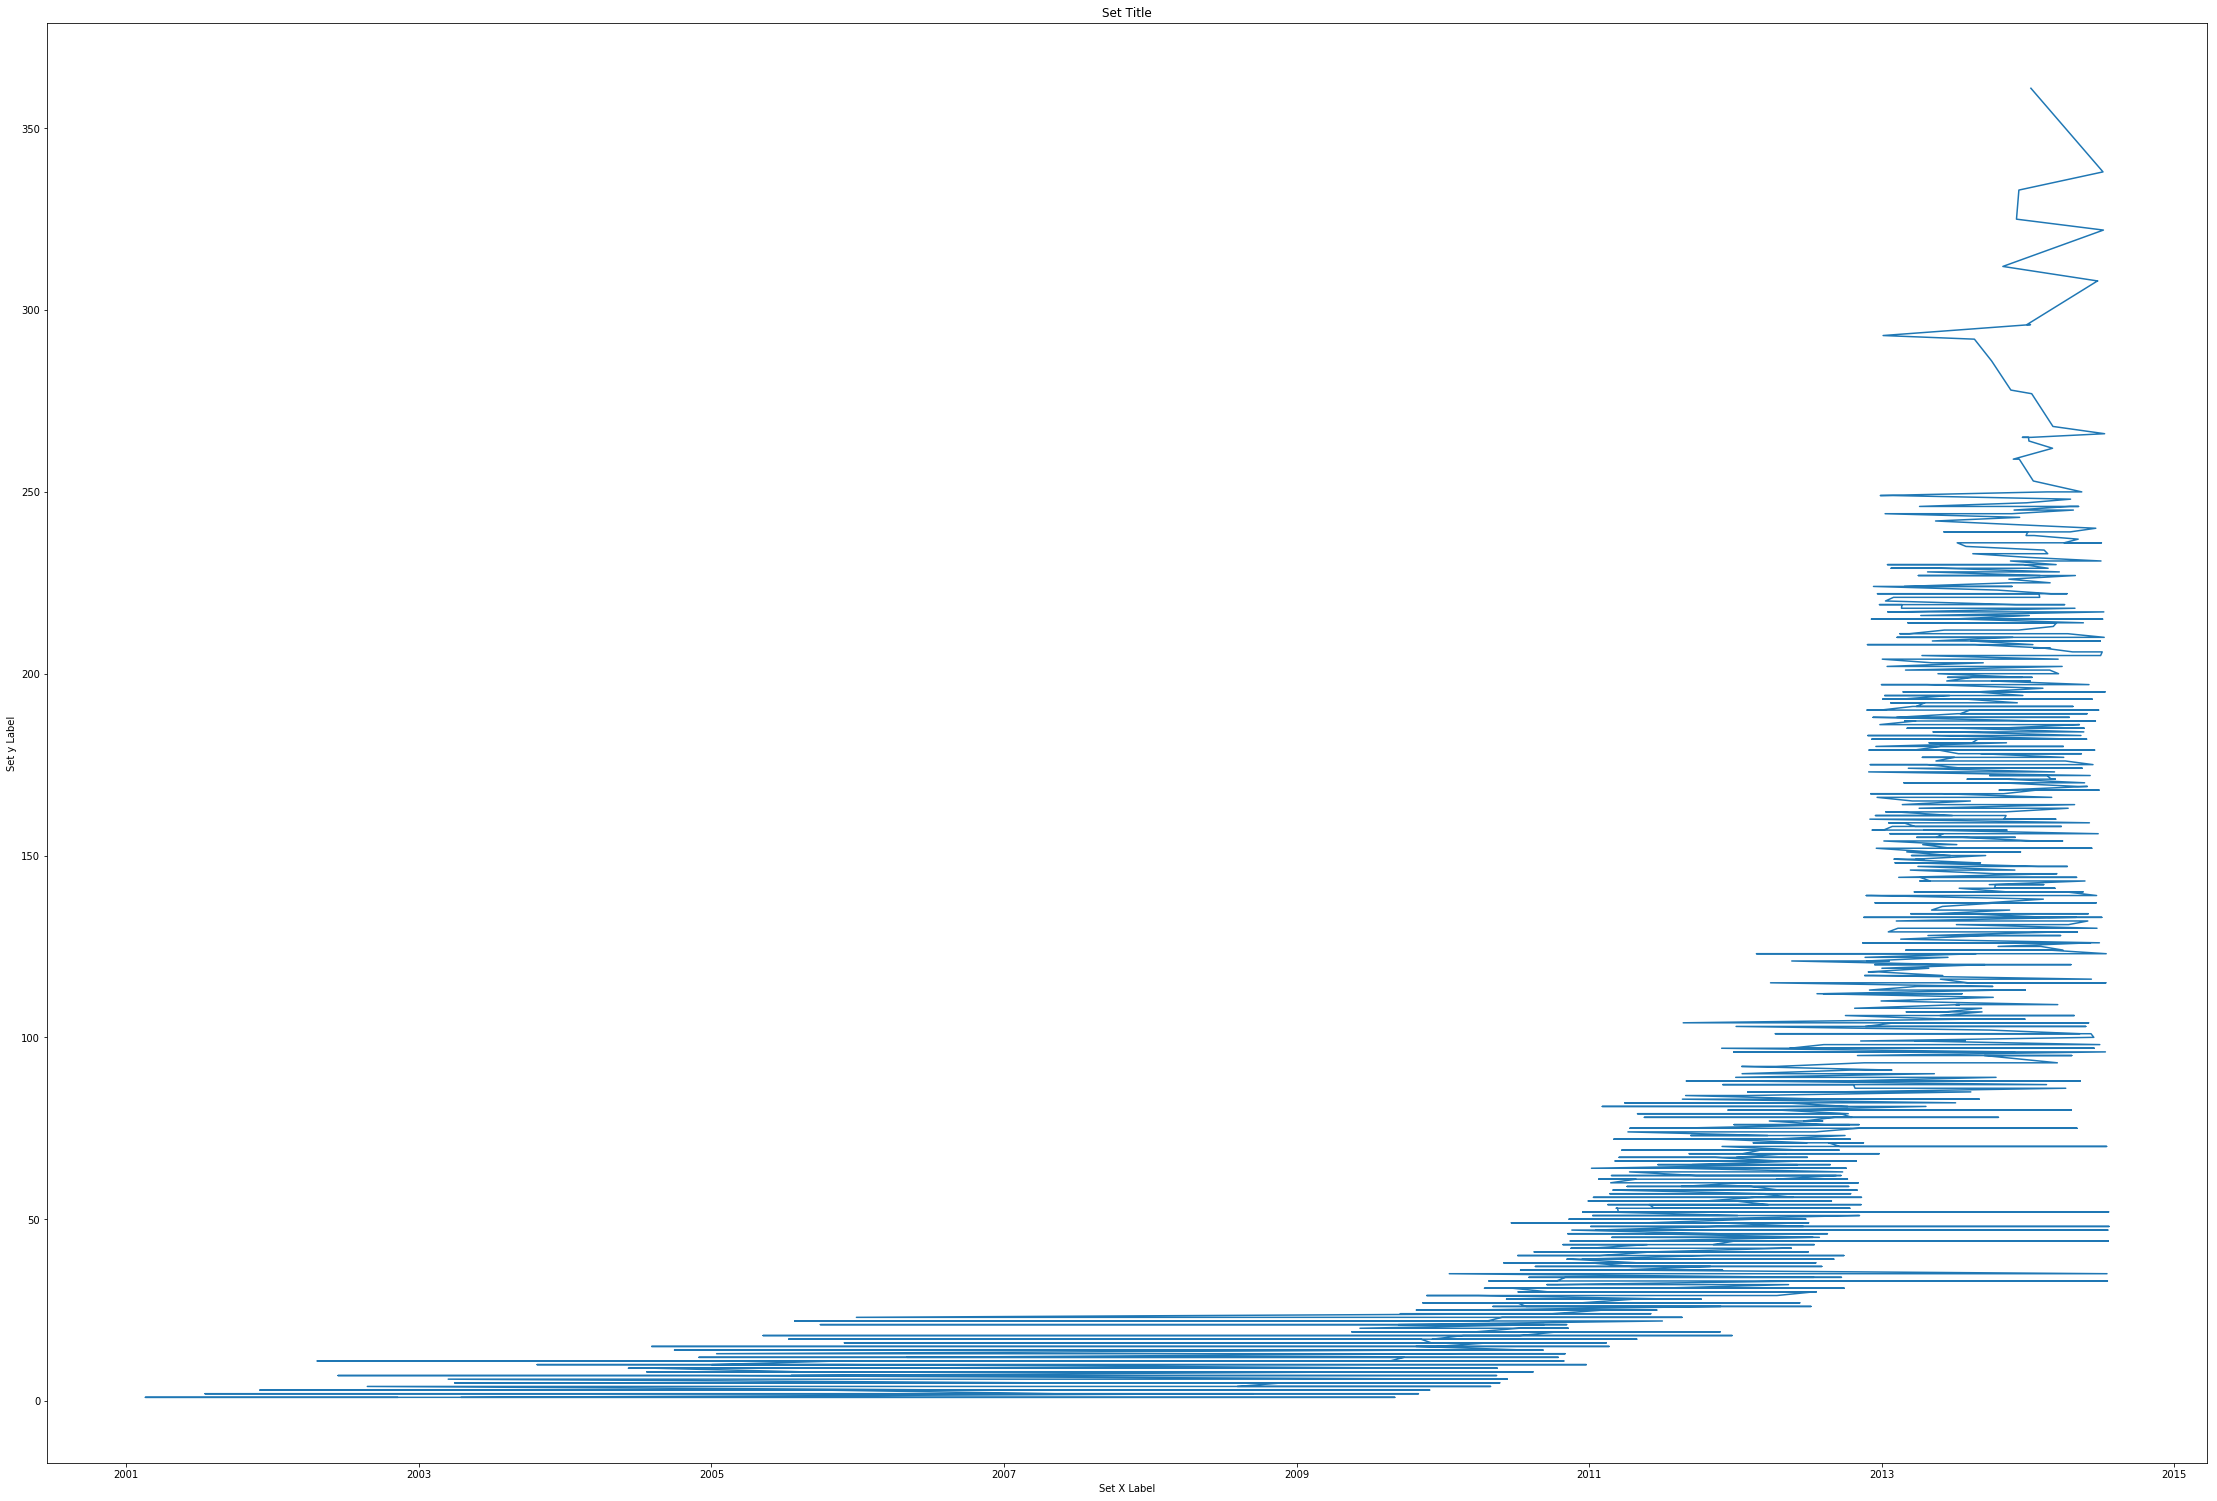

In [110]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([1, 1, 5, 5]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(dfSorted['reviewTime_convert'].value_counts())
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

Text(0.5,1,'Ratings given on Date')

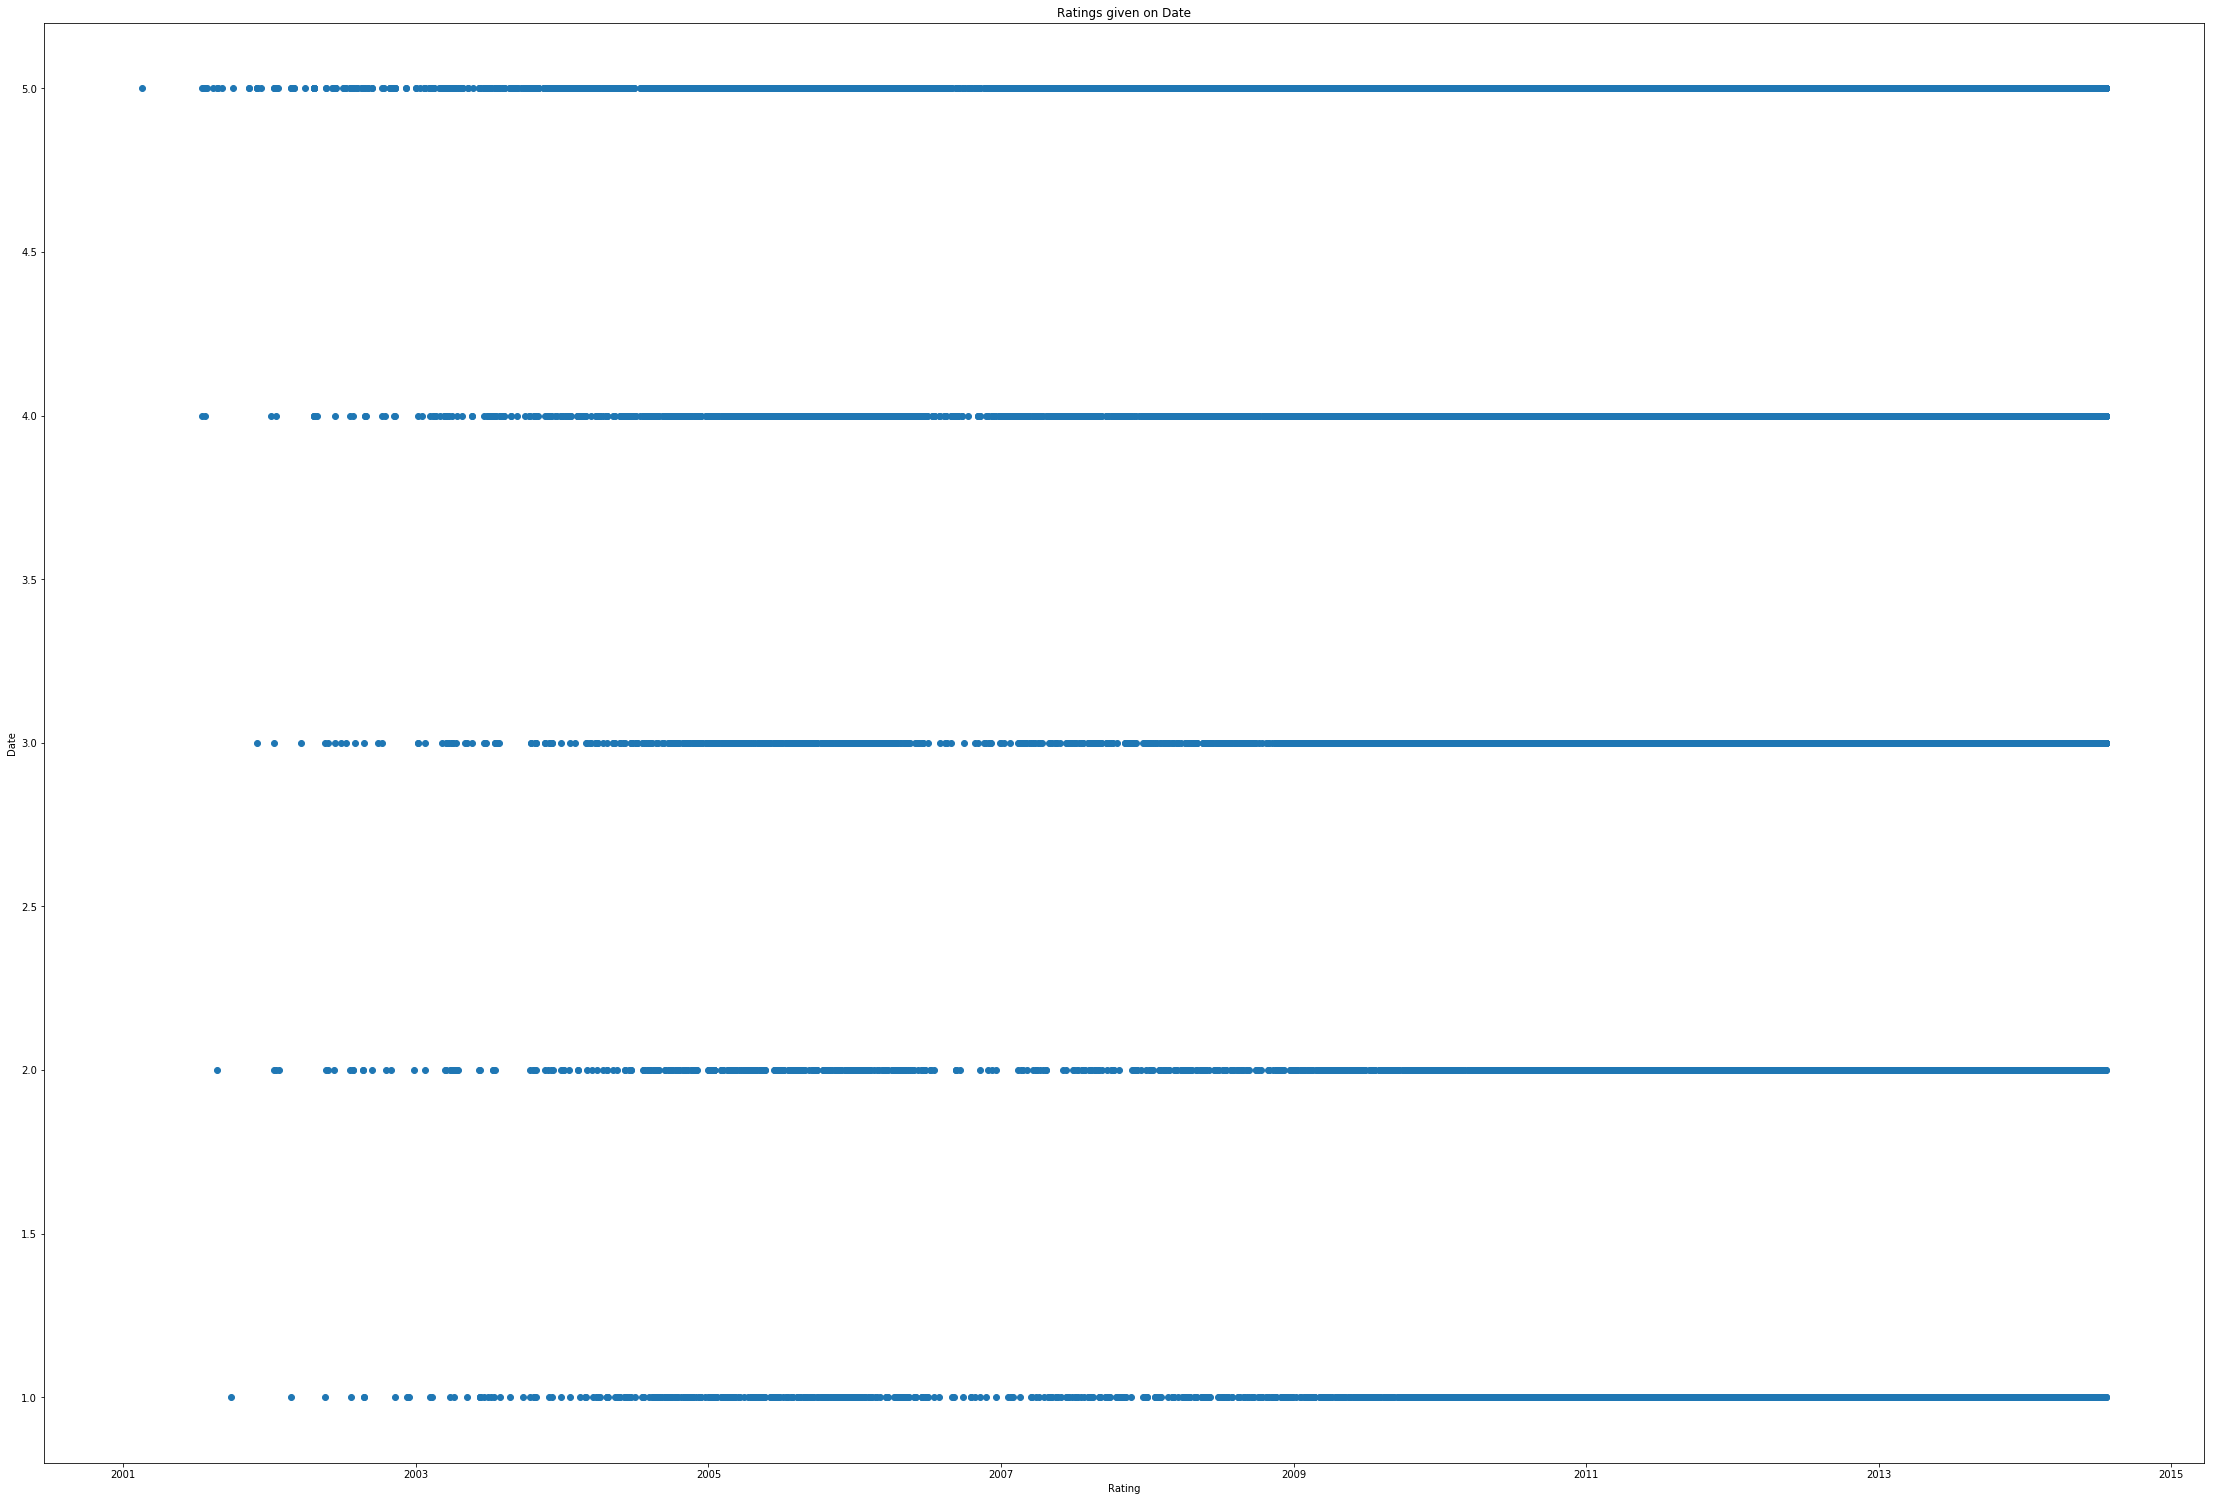

In [117]:
fig = plt.figure()
axes = fig.add_axes([1, 1, 5, 5]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot_date(df['reviewTime_convert'], df['overall'])
axes.set_xlabel('Rating')
axes.set_ylabel('Date')
axes.set_title('Ratings given on Date')